Image enhancement can be extremely useful in multiple areas. Often medical images like this X-ray can have low contrast, making it hard to spot important details. When we improve the contrast,the details become more visible. It's definitely easier to spot things on this one!

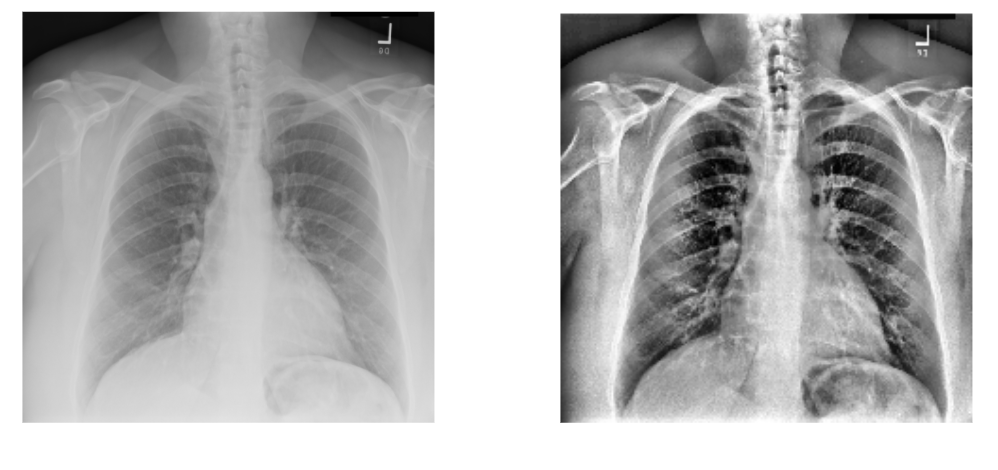

The contrast of an image can be seen as the measure of its dynamic range, or the "spread" of its histogram. Consider this image. 

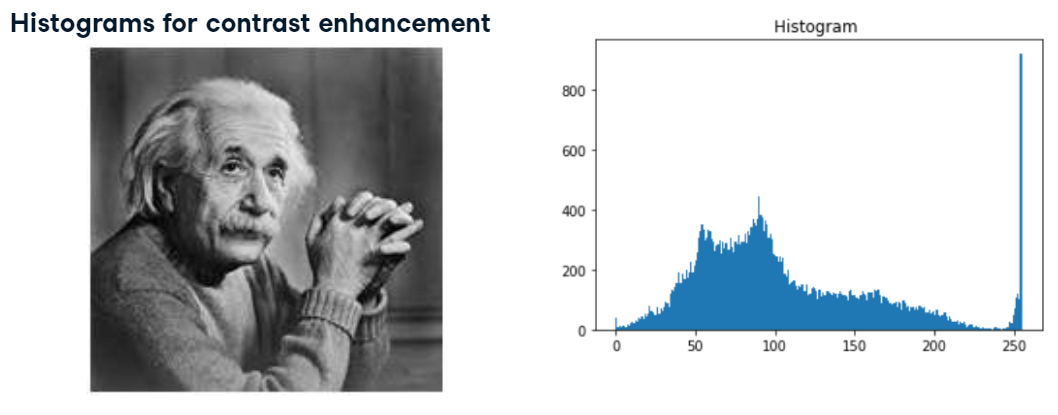

The contrast is the difference between the maximum and minimum pixel intensity in the image. The histogram of this image is shown on the right. The maximum value of pixel intensity is 255 while the minimum is 0. 255 - 0 = 255.

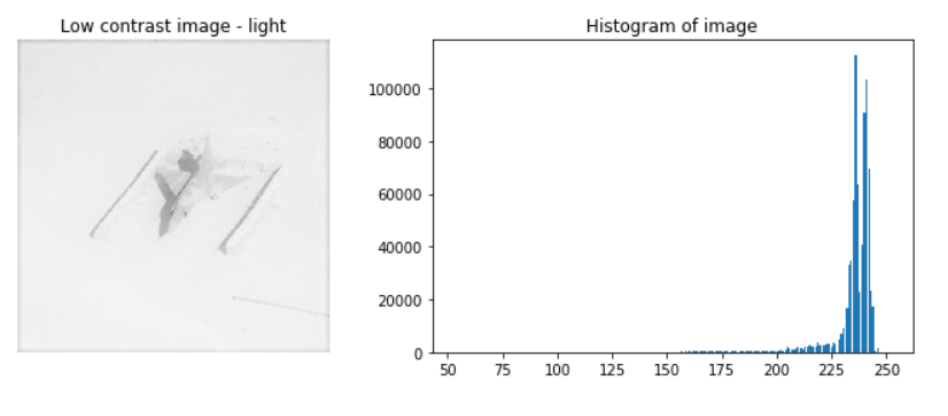

An image of low contrast has small difference between its dark and light pixel values. Is usually skewed either to the right (being mostly light), to the left (when is mostly dark), or located around the middle (mostly gray).

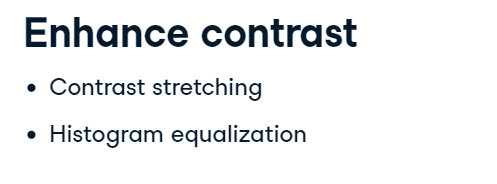

We can enhance contrast through contrast stretching which is used to stretch the histogram so the full range of intensity values of the image is filled. And histogram equalization, that spreads out the most frequent histogram intensity values using probability distribution. 

In general, there are three types of histogram equalization. The standard, the adaptive, and the limited adaptive. In scikit-image we can apply standard histogram equalization, contrast stretching, and contrast limited adaptive as we can see in these images.

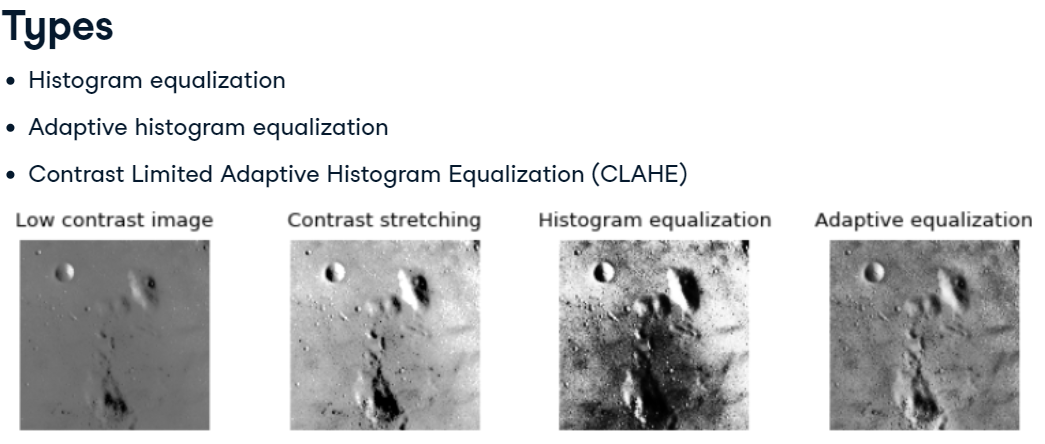


As we have seen Histogram equalization spreads out the most frequent intensity values.

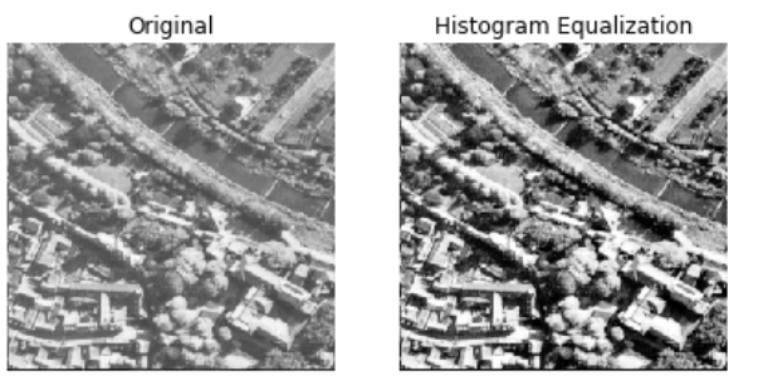

Let's start by taking this image as a simple image.

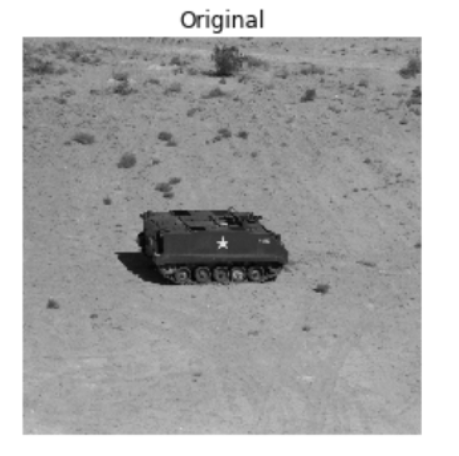

To apply this type of histogram equalization import the exposure module from scikit-image. We then have access to all equalization methods. In this case, the equalize_hist function, applies normal histogram equalization to the original image. Then we show both images, the original and equalized one to see the difference.

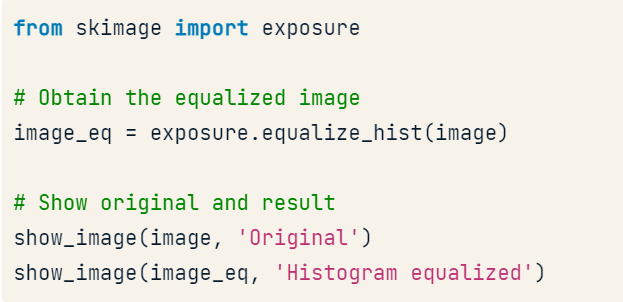

We get a result that, despite the increased contrast, doesn't look natural. In fact, it doesn't even look like the image has been enhanced at all.

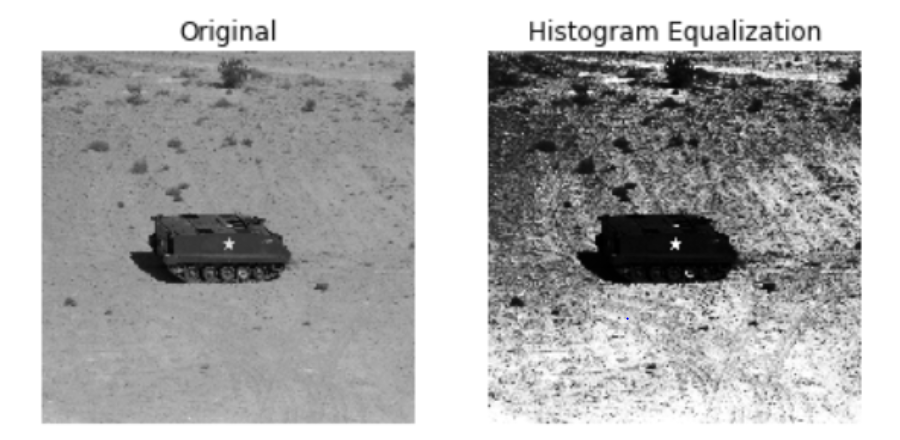

Another type of histogram equalization is the adaptive one. This method computes several histograms, each corresponding to a distinct part of the image, and uses them to redistribute the lightness values of the image histogram. 

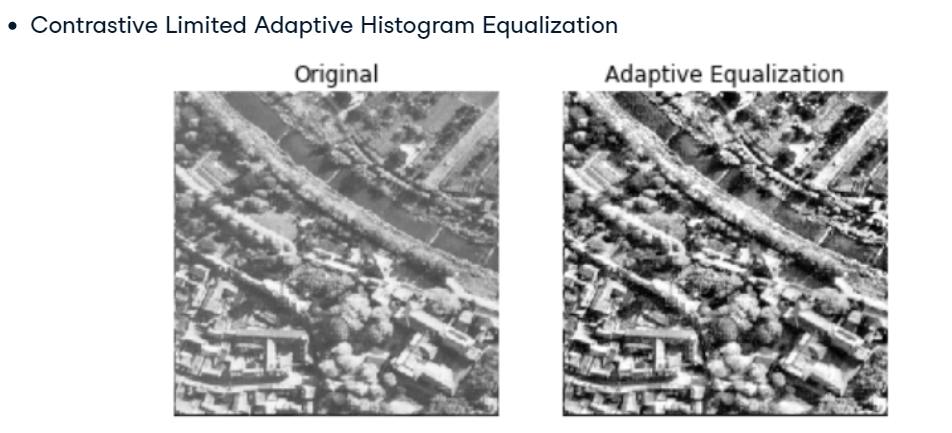

A type of this method is the Contrastive Limited Adaptive Histogram Equalization (CLAHE) which was developed to prevent over-amplification of noise that adaptive histogram equalization can give rise to. In this image, we see the result of the CLAHE method and it may seem very similar to the standard method.

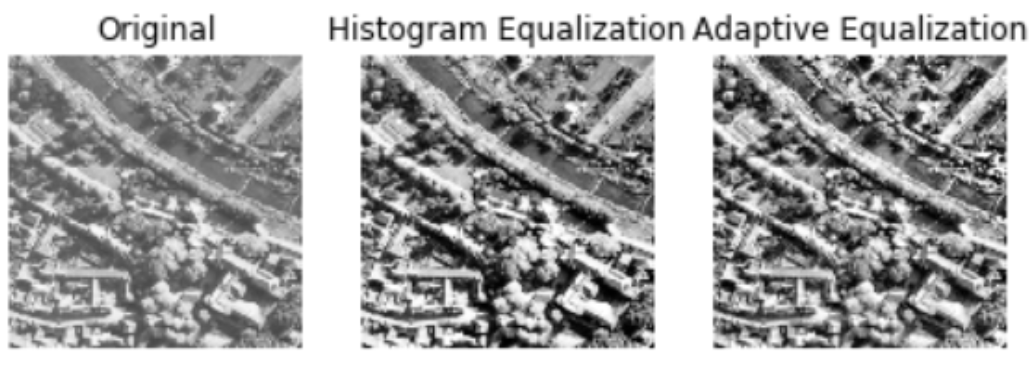

But if you look closer and compare the results, you will see that the adaptive method is not that intense, so it looks more natural. This is because it is not taking the global histogram of the entire image, but operates on small regions called tiles or neighborhoods.

To apply this kind of adaptive equalization we can use the equalize_adapthist function provided by scikit-image. It calculates the contrast transform function for each tile individually. We pass the original image as first parameter and a clip_limit. This clipping limit, is normalized between 0 and 1 (higher values give more contrast). Then, show the original and resulting images.

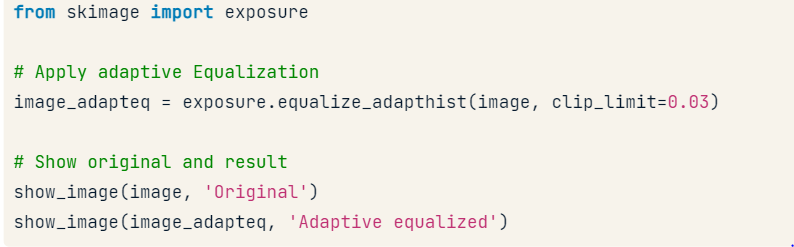
Comparing them, the resulting image is enhanced and we can better detail small objects and figures. Like the footprints in the ground.

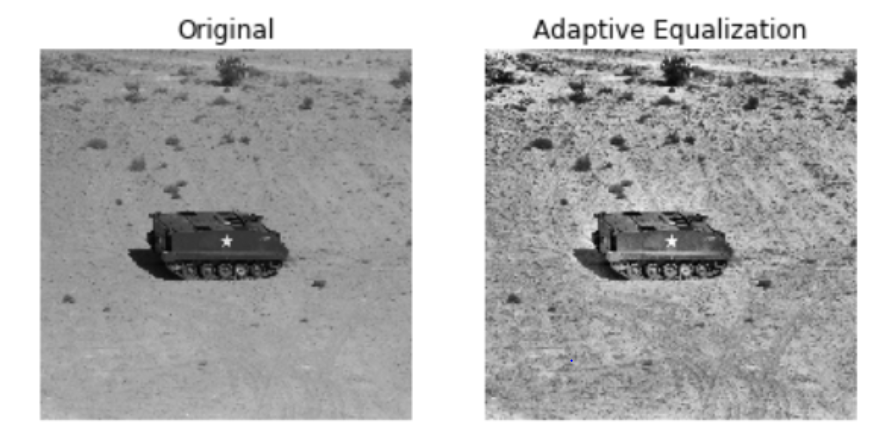


**What's the contrast of this image?**

![iss](./images/clock_image.png)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

In [6]:
ps_image = plt.imread('./images/clock_image.png')

In [13]:
np.max(ps_image)-np.min(ps_image) # calculated the range of the pixels intensities in the histogram, and so, the contrast of the image

1.0

### Medical images
You are trying to improve the tools of a hospital by pre-processing the X-ray images so that doctors have a higher chance of spotting relevant details.
![chest](./images/chest_xray_image.png)

First, you'll check the histogram of the image and then apply standard histogram equalization to improve the contrast.

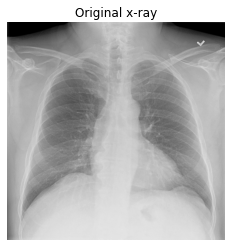

In [14]:
from skimage import exposure

chest_xray_image = plt.imread('./images/chest_xray_image.png')

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

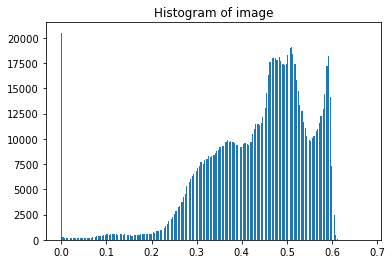

In [15]:
plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256);

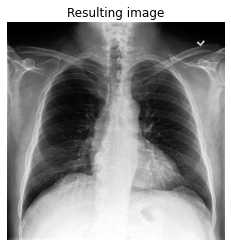

In [16]:
# Use histogram equalization to improve the contrast
xray_image_eq = exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

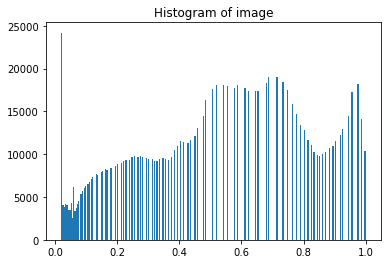

In [17]:
plt.title('Histogram of image')
plt.hist(xray_image_eq.ravel(), bins=256);

### Aerial image
In this exercise, we will improve the quality of an aerial image of a city. The image has low contrast and therefore we can not distinguish all the elements in it.

![aerial](./images/image_aerial.png)

For this we will use the normal or standard technique of Histogram Equalization.

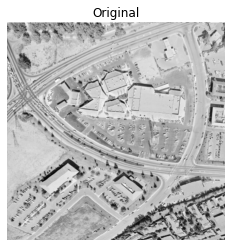

In [18]:
image_aerial = plt.imread('./images/image_aerial.png')

# Use histogram equalization to improve the contrast
image_eq = exposure.equalize_hist(image_aerial)

# Show the original image
show_image(image_aerial, 'Original')

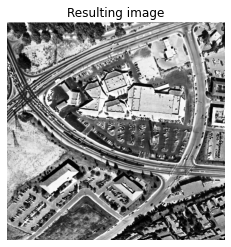

In [19]:
# Show the resulting image
show_image(image_eq, 'Resulting image')

 Now we can see more details of the objects in the image.
 
 ### Let's add some impact and contrast
Have you ever wanted to enhance the contrast of your photos so that they appear more dramatic?

In this exercise, we'll increase the contrast of a cup of coffee.

Even though this is not our Sunday morning coffee cup, you can still apply the same methods to any of our photos.

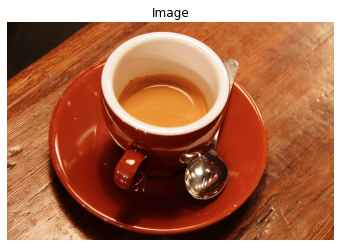

In [21]:
from skimage import io,data

# Load the image
coffee_image = io.imread('./images/coffee.png')

original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image
show_image(original_image)

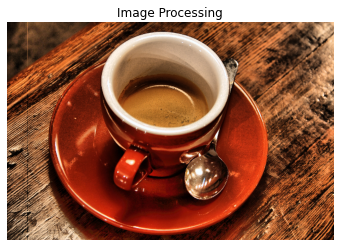

In [22]:
# Show the image to the equalized
show_image(adapthist_eq_image, 'Image Processing')

We have increased the contrast of the image using an algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. Local details can therefore be enhanced even in regions that are darker or lighter than the rest of the image.